In [1]:
%reload_ext autoreload
%autoreload 2

import sys

sys.path.append(".")
sys.path.append("..")
sys.path.append("../..")

In [2]:
from uniflow.flow.client import TransformClient
from uniflow.flow.config import ExpendReduceConfig
from uniflow.viz import Viz

/users/yangdsh/miniconda3/envs/uniflow/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
from uniflow.flow.flow_factory import FlowFactory
FlowFactory.list()

{'extract': ['ExtractImageFlow',
  'ExtractIpynbFlow',
  'ExtractMarkdownFlow',
  'ExtractPDFFlow',
  'ExtractTxtFlow',
  'ExtractS3TxtFlow'],
 'transform': ['TransformAzureOpenAIFlow',
  'TransformCopyFlow',
  'TransformHuggingFaceFlow',
  'TransformLMQGFlow',
  'TransformOpenAIFlow',
  'ExpandReduceFlow'],
 'rater': ['RaterFlow']}

In [4]:
client = TransformClient(ExpendReduceConfig())
input = [{"How are you?": "Fine.", "Who are you?": "I am Bob."}, {"Where are you?": "I am at home.", "What are you doing?": "Coding."}]
output = client.run(input)

100%|██████████████████████████████████████████████████████████████████████| 2/2 [00:00<00:00, 6684.15it/s]


In [5]:
output

[{'output': [[{'How are you? Who are you?': 'Fine. I am Bob.'}]],
  'root': <uniflow.node.Node at 0x7f0022617d60>},
 {'output': [[{'Where are you? What are you doing?': 'I am at home. Coding.'}]],
  'root': <uniflow.node.Node at 0x7f0022617fa0>}]

In [6]:
graph = Viz.to_digraph(output[1]["root"])


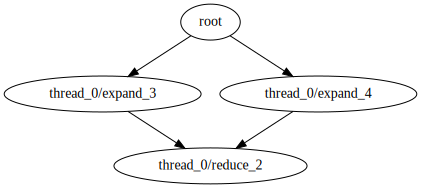

In [7]:
display(graph)